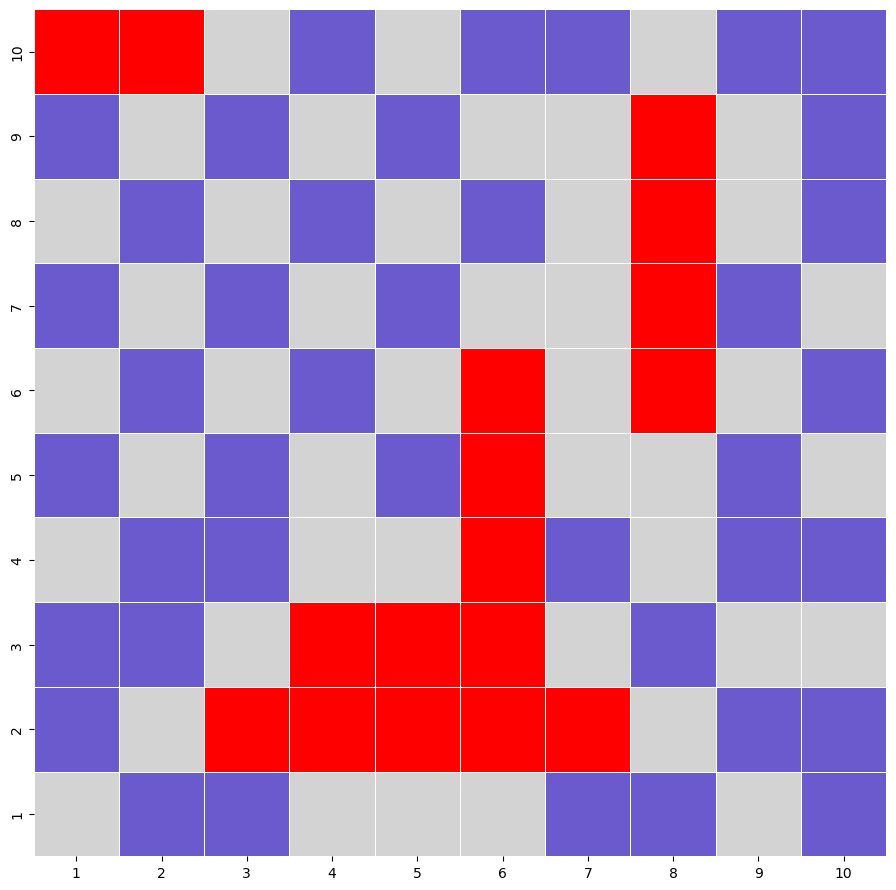

In [9]:
import numpy as np
import random 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
from matplotlib import rcParams

def generatePlot(board_with_probabilities, turn_counter):
    name = "plot" + str(turn_counter)

    cmap = colors.ListedColormap(['slateblue','red','lightgrey']) if turn_counter >= 100 else 'plasma'        

    ax = sns.heatmap(board_with_probabilities , linewidth = 0.5 , cmap = cmap, cbar=False)
    plt.legend([],[], frameon=False)
    ax.set_xticklabels(['1','2','3','4','5','6','7','8', '9', '10'])
    ax.set_yticklabels(['10','9','8','7','6','5','4','3', '2', '1'])
    rcParams['figure.figsize'] = 11,11
    #plt.imshow(board_with_probabilities, cmap='plasma', linewidth = 0.5)
    #plt.savefig(name)

def saveCSV(board_with_probabilities, turn_counter):
    name = "textfile" + str(turn_counter) + ".csv"
    np.savetxt(name, board_with_probabilities, delimiter=",")

def generateRandomBoard():
    opponents_board = np.full((10, 10), 0)
    ships = [5,4,3,3,2]

    for length_of_the_ship in ships:
        placed = False
        while placed == False:
            col_or_row = random.randint(0,1)
            
            # row
            if col_or_row == 1:  
                empty_slot_counter = 0              
                random_row = random.randint(0,9)
                random_col = random.randint(0,9-length_of_the_ship)

                for i in range(0,length_of_the_ship):
                    if opponents_board[random_row,random_col+i] == 0:
                        empty_slot_counter += 1

                if empty_slot_counter == length_of_the_ship:
                    for i in range(0,length_of_the_ship):
                        opponents_board[random_row,random_col+i] = 1
                    placed = True

            # col
            if col_or_row == 0:  
                empty_slot_counter = 0              
                random_col = random.randint(0,9)
                random_row = random.randint(0,9-length_of_the_ship)

                for i in range(0,length_of_the_ship):
                    if opponents_board[random_row+i,random_col] == 0:
                        empty_slot_counter += 1

                if empty_slot_counter == length_of_the_ship:
                    for i in range(0,length_of_the_ship):
                        opponents_board[random_row+i,random_col] = 1
                    placed = True

    return(opponents_board)

def possibibleLocationsProbability(board_with_hits, board_with_misses, length_of_the_ship):
    list_of_probabilities = []
    
    # Check all rows for possible locations
    for row in range(0,10):
        for col in range(0,11-length_of_the_ship):
            positions_to_consider = range(col, col+length_of_the_ship)
            # State where hits happened
            positions_with_hits = []
            empty_slot_counter = 0
            # Check if the elements of a list all correspond to 0s, and if they do create a matrix where that segment has a certain probabiliity
            for element in positions_to_consider:
                if board_with_misses[row,element] == 0:
                    if board_with_hits[row, element] == 1:
                        positions_with_hits.append(element)    
                    empty_slot_counter += 1

            # Check if the number of continious empty slots corresponds to the length of the ship   
            if empty_slot_counter == length_of_the_ship:
                new_state = np.full((10, 10), 0.0)
                if_there_is_hit = 4*len(positions_with_hits) if len(positions_with_hits) else 1
                for element in positions_to_consider:
                    if element in positions_with_hits:
                        new_state[row, element] = 0
                    else:    
                        new_state[row,element] = float(length_of_the_ship) * if_there_is_hit
                list_of_probabilities.append(new_state)

    # Check all cols for possible locations
    for col in range(0,10):
        for row in range(0,11-length_of_the_ship):
            positions_to_consider = range(row, row+length_of_the_ship)
            positions_with_hits = []
            empty_slot_counter = 0

            # Check if the elements of a list all correspond to 0s, and if they do create a matrix where that segment has a certain probabiliity
            for element in positions_to_consider:
                if board_with_misses[element,col] == 0:
                    if board_with_hits[element,col] == 1:
                        positions_with_hits.append(element)
                    empty_slot_counter += 1

            # Check if the number of continious empty slots corresponds to the length of the ship   
            if empty_slot_counter == length_of_the_ship:
                if_there_is_hit = 4 if len(positions_with_hits) else 1

                new_state = np.full((10, 10), 0.0)
                for element in positions_to_consider:
                    if element in positions_with_hits:
                        new_state[element,col] = 0
                    else:    
                        new_state[element,col] = float(length_of_the_ship) * if_there_is_hit
                list_of_probabilities.append(new_state)


    final_matrix = np.full((10, 10), 0)
    for curr_matrix in list_of_probabilities:
        final_matrix = np.add(final_matrix, curr_matrix)

    return(final_matrix)

def generateProbabilitiesForAllShips(board_with_hits, board_with_misses):
    final = np.full((10, 10), 0)
    ships = [5,4,3,3,2]
    for i in ships:
        probabilites = possibibleLocationsProbability(board_with_hits, board_with_misses, i)
        final = np.add(final, probabilites)
    return(final)

def generateNextMove(board_with_probabilities):
    return(np.unravel_index(board_with_probabilities.argmax(), board_with_probabilities.shape))

def bot (opponents_board, board_with_hits, board_with_misses, turn_counter, successful_hits):
    if successful_hits >= 17 or turn_counter>=100:
        generatePlot((board_with_hits+board_with_misses), turn_counter + 100)
        return (turn_counter)

    board_with_probabilities = generateProbabilitiesForAllShips(board_with_hits, board_with_misses)
    nextHit = generateNextMove(board_with_probabilities)
    row = nextHit[0]
    col = nextHit[1]
    generatePlot(board_with_probabilities, turn_counter)
    generatePlot((board_with_hits+board_with_misses), turn_counter + 100)
    # saveCSV(board_with_probabilities, turn_counter)

    if opponents_board[row,col] == 1:    
        successful_hits += 1
        board_with_hits[row,col] = 1
        board_with_probabilities[row,col] = 0 

    else:
        board_with_misses[row,col] = 2

    return (bot (opponents_board, board_with_hits, board_with_misses, turn_counter+1, successful_hits))


final_sum = 0
opponents_board = generateRandomBoard()
board_with_probabilities = np.zeros((10,10))
board_with_hits = np.zeros((10,10))
board_with_misses = np.zeros((10,10))
final_sum += bot(opponents_board, board_with_hits, board_with_misses, 0, 0)

0.38


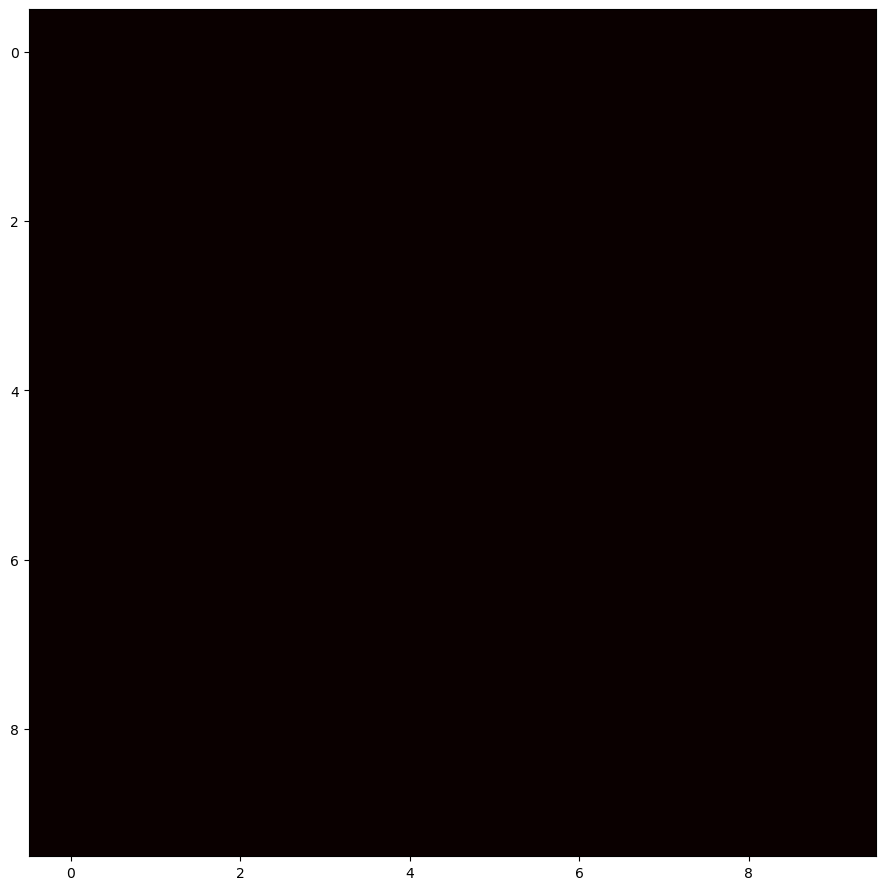

In [5]:
generateProbabilitiesForAllShips(board_with_hits, board_with_misses)
print(final_sum/100)
plt.imshow(board_with_probabilities, cmap='hot')
plt.show()

In [17]:
import numpy as np
import random 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
from matplotlib import rcParams

# Define board size
NUM_ROWS = 8
NUM_COLS = 11

def generatePlot(board_with_probabilities, turn_counter):
    name = "plot" + str(turn_counter)
    cmap = colors.ListedColormap(['slateblue','red','lightgrey']) if turn_counter >= 100 else 'plasma'        

    ax = sns.heatmap(board_with_probabilities, linewidth=0.5, cmap=cmap, cbar=False)
    ax.set_xticklabels([str(i+1) for i in range(NUM_COLS)])
    ax.set_yticklabels([str(NUM_ROWS - i) for i in range(NUM_ROWS)])
    rcParams['figure.figsize'] = 11,11
    plt.legend([],[], frameon=False)
    plt.savefig(name)
    plt.close()

def saveCSV(board_with_probabilities, turn_counter):
    name = "textfile" + str(turn_counter) + ".csv"
    np.savetxt(name, board_with_probabilities, delimiter=",")

def generateRandomBoard():
    opponents_board = np.full((NUM_ROWS, NUM_COLS), 0)
    ships = [5, 4, 3, 2, 2]

    for length in ships:
        placed = False
        while not placed:
            orientation = random.randint(0, 1)  # 0 = vertical, 1 = horizontal

            if orientation == 1:  # Horizontal
                row = random.randint(0, NUM_ROWS - 1)
                col = random.randint(0, NUM_COLS - length)
                if np.all(opponents_board[row, col:col+length] == 0):
                    opponents_board[row, col:col+length] = 1
                    placed = True

            else:  # Vertical
                row = random.randint(0, NUM_ROWS - length)
                col = random.randint(0, NUM_COLS - 1)
                if np.all(opponents_board[row:row+length, col] == 0):
                    opponents_board[row:row+length, col] = 1
                    placed = True

    return opponents_board

def possibibleLocationsProbability(board_with_hits, board_with_misses, ship_length):
    list_of_probabilities = []

    # Horizontal placements
    for row in range(NUM_ROWS):
        for col in range(NUM_COLS - ship_length + 1):
            positions = range(col, col + ship_length)
            positions_with_hits = []
            empty_slots = 0
            for c in positions:
                if board_with_misses[row, c] == 0:
                    if board_with_hits[row, c] == 1:
                        positions_with_hits.append(c)
                    empty_slots += 1

            if empty_slots == ship_length:
                new_state = np.zeros((NUM_ROWS, NUM_COLS))
                multiplier = 4 * len(positions_with_hits) if positions_with_hits else 1
                for c in positions:
                    if c not in positions_with_hits:
                        new_state[row, c] = ship_length * multiplier
                list_of_probabilities.append(new_state)

    # Vertical placements
    for col in range(NUM_COLS):
        for row in range(NUM_ROWS - ship_length + 1):
            positions = range(row, row + ship_length)
            positions_with_hits = []
            empty_slots = 0
            for r in positions:
                if board_with_misses[r, col] == 0:
                    if board_with_hits[r, col] == 1:
                        positions_with_hits.append(r)
                    empty_slots += 1

            if empty_slots == ship_length:
                new_state = np.zeros((NUM_ROWS, NUM_COLS))
                multiplier = 4 * len(positions_with_hits) if positions_with_hits else 1
                for r in positions:
                    if r not in positions_with_hits:
                        new_state[r, col] = ship_length * multiplier
                list_of_probabilities.append(new_state)

    final_matrix = np.zeros((NUM_ROWS, NUM_COLS))
    for matrix in list_of_probabilities:
        final_matrix += matrix

    return final_matrix

def generateProbabilitiesForAllShips(board_with_hits, board_with_misses):
    final = np.zeros((NUM_ROWS, NUM_COLS))
    ships = [5, 4, 3, 2, 2]
    for ship_length in ships:
        final += possibibleLocationsProbability(board_with_hits, board_with_misses, ship_length)
    return final

def generateNextMove(board_with_probabilities):
    return np.unravel_index(np.argmax(board_with_probabilities), board_with_probabilities.shape)

def bot(opponents_board, board_with_hits, board_with_misses, turn_counter, successful_hits):
    if successful_hits >= 16 or turn_counter >= 100:
        generatePlot(board_with_hits + board_with_misses, turn_counter + 100)
        return turn_counter

    board_with_probabilities = generateProbabilitiesForAllShips(board_with_hits, board_with_misses)
    row, col = generateNextMove(board_with_probabilities)

    generatePlot(board_with_probabilities, turn_counter)
    generatePlot(board_with_hits + board_with_misses, turn_counter + 100)

    if opponents_board[row, col] == 1:
        board_with_hits[row, col] = 1
        successful_hits += 1
    else:
        board_with_misses[row, col] = 2

    return bot(opponents_board, board_with_hits, board_with_misses, turn_counter + 1, successful_hits)

# Run the simulation
opponents_board = generateRandomBoard()
board_with_hits = np.zeros((NUM_ROWS, NUM_COLS))
board_with_misses = np.zeros((NUM_ROWS, NUM_COLS))
bot(opponents_board, board_with_hits, board_with_misses, 0, 0)

45

Running simulations: 100%|███████████████████████████████████████████████████████████| 500/500 [01:48<00:00,  4.62it/s]


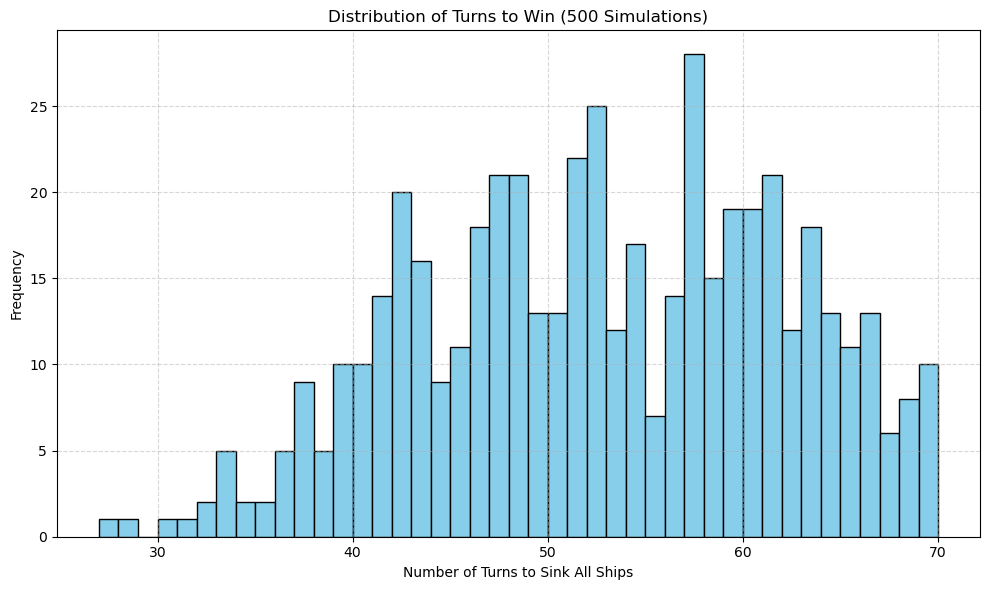

In [19]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

# Define board size
NUM_ROWS = 8
NUM_COLS = 11

# Define ships (total 16 hits)
SHIP_LENGTHS = [5, 4, 3, 2, 2]

def generateRandomBoard():
    opponents_board = np.full((NUM_ROWS, NUM_COLS), 0)
    for length in SHIP_LENGTHS:
        placed = False
        while not placed:
            orientation = random.randint(0, 1)  # 0 = vertical, 1 = horizontal
            if orientation == 1:  # Horizontal
                row = random.randint(0, NUM_ROWS - 1)
                col = random.randint(0, NUM_COLS - length)
                if np.all(opponents_board[row, col:col+length] == 0):
                    opponents_board[row, col:col+length] = 1
                    placed = True
            else:  # Vertical
                row = random.randint(0, NUM_ROWS - length)
                col = random.randint(0, NUM_COLS - 1)
                if np.all(opponents_board[row:row+length, col] == 0):
                    opponents_board[row:row+length, col] = 1
                    placed = True
    return opponents_board

def possibibleLocationsProbability(board_with_hits, board_with_misses, ship_length):
    list_of_probabilities = []

    # Horizontal placements
    for row in range(NUM_ROWS):
        for col in range(NUM_COLS - ship_length + 1):
            positions = range(col, col + ship_length)
            positions_with_hits = []
            empty_slots = 0
            for c in positions:
                if board_with_misses[row, c] == 0:
                    if board_with_hits[row, c] == 1:
                        positions_with_hits.append(c)
                    empty_slots += 1
            if empty_slots == ship_length:
                new_state = np.zeros((NUM_ROWS, NUM_COLS))
                multiplier = 4 * len(positions_with_hits) if positions_with_hits else 1
                for c in positions:
                    if c not in positions_with_hits:
                        new_state[row, c] = ship_length * multiplier
                list_of_probabilities.append(new_state)

    # Vertical placements
    for col in range(NUM_COLS):
        for row in range(NUM_ROWS - ship_length + 1):
            positions = range(row, row + ship_length)
            positions_with_hits = []
            empty_slots = 0
            for r in positions:
                if board_with_misses[r, col] == 0:
                    if board_with_hits[r, col] == 1:
                        positions_with_hits.append(r)
                    empty_slots += 1
            if empty_slots == ship_length:
                new_state = np.zeros((NUM_ROWS, NUM_COLS))
                multiplier = 4 * len(positions_with_hits) if positions_with_hits else 1
                for r in positions:
                    if r not in positions_with_hits:
                        new_state[r, col] = ship_length * multiplier
                list_of_probabilities.append(new_state)

    final_matrix = np.zeros((NUM_ROWS, NUM_COLS))
    for matrix in list_of_probabilities:
        final_matrix += matrix
    return final_matrix

def generateProbabilitiesForAllShips(board_with_hits, board_with_misses):
    final = np.zeros((NUM_ROWS, NUM_COLS))
    for ship_length in SHIP_LENGTHS:
        final += possibibleLocationsProbability(board_with_hits, board_with_misses, ship_length)
    return final

def generateNextMove(board_with_probabilities):
    return np.unravel_index(np.argmax(board_with_probabilities), board_with_probabilities.shape)

def bot(opponents_board):
    board_with_hits = np.zeros((NUM_ROWS, NUM_COLS))
    board_with_misses = np.zeros((NUM_ROWS, NUM_COLS))
    turn_counter = 0
    successful_hits = 0
    while successful_hits < 16 and turn_counter < 100:
        board_with_probabilities = generateProbabilitiesForAllShips(board_with_hits, board_with_misses)
        row, col = generateNextMove(board_with_probabilities)
        if opponents_board[row, col] == 1:
            board_with_hits[row, col] = 1
            successful_hits += 1
        else:
            board_with_misses[row, col] = 2
        turn_counter += 1
    return turn_counter

# Run 500 trials
NUM_TRIALS = 500
turn_counts = []

for _ in tqdm(range(NUM_TRIALS), desc="Running simulations"):
    board = generateRandomBoard()
    turns = bot(board)
    turn_counts.append(turns)

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(turn_counts, bins=range(min(turn_counts), max(turn_counts)+1), color='skyblue', edgecolor='black')
plt.title("Distribution of Turns to Win (500 Simulations)")
plt.xlabel("Number of Turns to Sink All Ships")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import random 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
from matplotlib import rcParams

# Define board size
NUM_ROWS = 8
NUM_COLS = 11

def generatePlot(board_with_probabilities, turn_counter):
    name = "plot" + str(turn_counter)
    cmap = colors.ListedColormap(['slateblue','red','lightgrey']) if turn_counter >= 100 else 'plasma'        

    ax = sns.heatmap(board_with_probabilities, linewidth=0.5, cmap=cmap, cbar=False)
    ax.set_xticklabels([str(i+1) for i in range(NUM_COLS)])
    ax.set_yticklabels([str(NUM_ROWS - i) for i in range(NUM_ROWS)])
    rcParams['figure.figsize'] = 11,11
    plt.legend([],[], frameon=False)
    plt.savefig(name)
    plt.close()

def saveCSV(board_with_probabilities, turn_counter):
    name = "textfile" + str(turn_counter) + ".csv"
    np.savetxt(name, board_with_probabilities, delimiter=",")

def generateRandomBoard():
    opponents_board = np.full((NUM_ROWS, NUM_COLS), 0)
    ships = [5, 4, 3, 2, 2]

    for length in ships:
        placed = False
        while not placed:
            orientation = random.randint(0, 1)  # 0 = vertical, 1 = horizontal

            if orientation == 1:  # Horizontal
                row = random.randint(0, NUM_ROWS - 1)
                col = random.randint(0, NUM_COLS - length)
                if np.all(opponents_board[row, col:col+length] == 0):
                    opponents_board[row, col:col+length] = 1
                    placed = True

            else:  # Vertical
                row = random.randint(0, NUM_ROWS - length)
                col = random.randint(0, NUM_COLS - 1)
                if np.all(opponents_board[row:row+length, col] == 0):
                    opponents_board[row:row+length, col] = 1
                    placed = True

    return opponents_board

def possibibleLocationsProbability(board_with_hits, board_with_misses, ship_length):
    list_of_probabilities = []

    # Horizontal placements
    for row in range(NUM_ROWS):
        for col in range(NUM_COLS - ship_length + 1):
            positions = range(col, col + ship_length)
            positions_with_hits = []
            empty_slots = 0
            for c in positions:
                if board_with_misses[row, c] == 0:
                    if board_with_hits[row, c] == 1:
                        positions_with_hits.append(c)
                    empty_slots += 1

            if empty_slots == ship_length:
                new_state = np.zeros((NUM_ROWS, NUM_COLS))
                multiplier = 4 * len(positions_with_hits) if positions_with_hits else 1
                for c in positions:
                    if c not in positions_with_hits:
                        new_state[row, c] = ship_length * multiplier
                list_of_probabilities.append(new_state)

    # Vertical placements
    for col in range(NUM_COLS):
        for row in range(NUM_ROWS - ship_length + 1):
            positions = range(row, row + ship_length)
            positions_with_hits = []
            empty_slots = 0
            for r in positions:
                if board_with_misses[r, col] == 0:
                    if board_with_hits[r, col] == 1:
                        positions_with_hits.append(r)
                    empty_slots += 1

            if empty_slots == ship_length:
                new_state = np.zeros((NUM_ROWS, NUM_COLS))
                multiplier = 4 * len(positions_with_hits) if positions_with_hits else 1
                for r in positions:
                    if r not in positions_with_hits:
                        new_state[r, col] = ship_length * multiplier
                list_of_probabilities.append(new_state)

    final_matrix = np.zeros((NUM_ROWS, NUM_COLS))
    for matrix in list_of_probabilities:
        final_matrix += matrix

    return final_matrix

def generateProbabilitiesForAllShips(board_with_hits, board_with_misses):
    final = np.zeros((NUM_ROWS, NUM_COLS))
    ships = [5, 4, 3, 2, 2]
    for ship_length in ships:
        final += possibibleLocationsProbability(board_with_hits, board_with_misses, ship_length)
    return final

def generateNextMove(board_with_probabilities):
    return np.unravel_index(np.argmax(board_with_probabilities), board_with_probabilities.shape)

def bot(opponents_board, board_with_hits, board_with_misses, turn_counter, successful_hits):
    if successful_hits >= 16 or turn_counter >= 100:
        generatePlot(board_with_hits + board_with_misses, turn_counter + 100)
        return turn_counter

    board_with_probabilities = generateProbabilitiesForAllShips(board_with_hits, board_with_misses)
    row, col = generateNextMove(board_with_probabilities)

    generatePlot(board_with_probabilities, turn_counter)
    generatePlot(board_with_hits + board_with_misses, turn_counter + 100)

    if opponents_board[row, col] == 1:
        board_with_hits[row, col] = 1
        successful_hits += 1
    else:
        board_with_misses[row, col] = 2

    return bot(opponents_board, board_with_hits, board_with_misses, turn_counter + 1, successful_hits)

# Run the simulation
opponents_board = generateRandomBoard()
board_with_hits = np.zeros((NUM_ROWS, NUM_COLS))
board_with_misses = np.zeros((NUM_ROWS, NUM_COLS))
bot(opponents_board, board_with_hits, board_with_misses, 0, 0)

In [ ]:
class HeatmapBattleshipAI(BattleshipAI):
    def __init__(self, player_id: str, board_shape: Tuple[int, int], ship_schema: Dict[str, Any]):
        super().__init__(player_id, board_shape, ship_schema)
        self.rows, self.cols = board_shape

    def select_next_move(self) -> Tuple[int, int]:
        board_with_hits = (self.board_state == WellState.HIT).astype(int)
        board_with_misses = (self.board_state == WellState.MISS).astype(int) * 2

        prob_matrix = self.generate_probabilities_for_all_ships(board_with_hits, board_with_misses)
        move = np.unravel_index(np.argmax(prob_matrix), prob_matrix.shape)
        return move

    def generate_probabilities_for_all_ships(self, board_with_hits, board_with_misses):
        final = np.zeros((self.rows, self.cols))
        ship_lengths = []
        for ship, data in self.ship_schema.items():
            ship_lengths.extend([data['length']] * data['count'])
        for length in ship_lengths:
            final += self.possible_locations_probability(board_with_hits, board_with_misses, length)
        return final

    def possible_locations_probability(self, board_with_hits, board_with_misses, ship_length):
        list_of_probabilities = []

        # Horizontal
        for row in range(self.rows):
            for col in range(self.cols - ship_length + 1):
                segment = range(col, col + ship_length)
                positions_with_hits = []
                empty_slots = 0
                for c in segment:
                    if board_with_misses[row, c] == 0:
                        if board_with_hits[row, c] == 1:
                            positions_with_hits.append(c)
                        empty_slots += 1
                if empty_slots == ship_length:
                    prob_matrix = np.zeros((self.rows, self.cols))
                    multiplier = 4 * len(positions_with_hits) if positions_with_hits else 1
                    for c in segment:
                        if c not in positions_with_hits:
                            prob_matrix[row, c] = ship_length * multiplier
                    list_of_probabilities.append(prob_matrix)

        # Vertical
        for col in range(self.cols):
            for row in range(self.rows - ship_length + 1):
                segment = range(row, row + ship_length)
                positions_with_hits = []
                empty_slots = 0
                for r in segment:
                    if board_with_misses[r, col] == 0:
                        if board_with_hits[r, col] == 1:
                            positions_with_hits.append(r)
                        empty_slots += 1
                if empty_slots == ship_length:
                    prob_matrix = np.zeros((self.rows, self.cols))
                    multiplier = 4 * len(positions_with_hits) if positions_with_hits else 1
                    for r in segment:
                        if r not in positions_with_hits:
                            prob_matrix[r, col] = ship_length * multiplier
                    list_of_probabilities.append(prob_matrix)

        final_matrix = np.zeros((self.rows, self.cols))
        for m in list_of_probabilities:
            final_matrix += m
        return final_matrix

Running simulations: 100%|███████████████████████████████████████████████████████████| 500/500 [04:56<00:00,  1.69it/s]


🔥 Worst case took 71 turns.
📌 Ship configurations (top-left and orientation):
  - Start: (6, 0), Orientation: horizontal, Length: 5
  - Start: (0, 9), Orientation: vertical, Length: 4
  - Start: (0, 0), Orientation: horizontal, Length: 3
  - Start: (2, 5), Orientation: vertical, Length: 2
  - Start: (6, 7), Orientation: horizontal, Length: 2


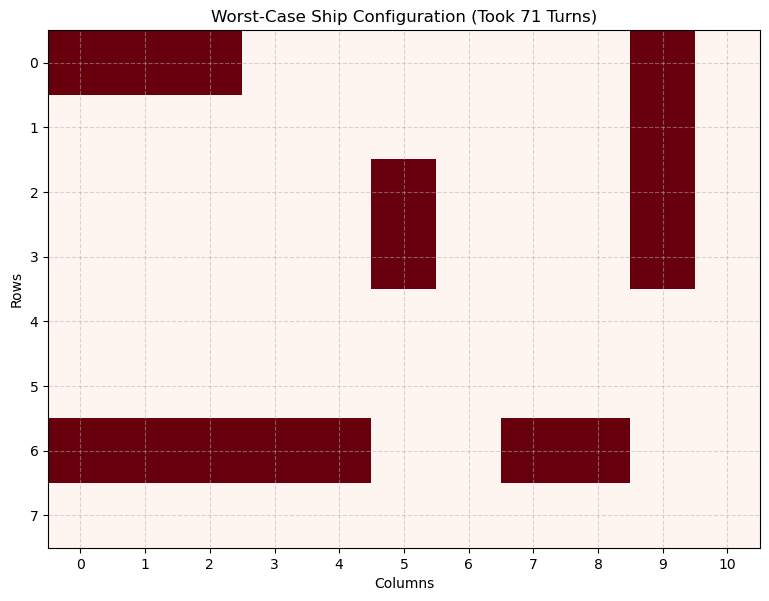

In [23]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Constants
NUM_ROWS, NUM_COLS = 8, 11
SHIP_LENGTHS = [5, 4, 3, 2, 2]
NUM_TRIALS = 500

# Board generation with ship config tracking
def generate_random_board_with_config():
    board = np.full((NUM_ROWS, NUM_COLS), 0)
    config = []

    for length in SHIP_LENGTHS:
        placed = False
        while not placed:
            orientation = random.randint(0, 1)  # 0 = vertical, 1 = horizontal
            if orientation == 1:  # horizontal
                row = random.randint(0, NUM_ROWS - 1)
                col = random.randint(0, NUM_COLS - length)
                if np.all(board[row, col:col+length] == 0):
                    board[row, col:col+length] = 1
                    config.append({'start': (row, col), 'orientation': 'horizontal', 'length': length})
                    placed = True
            else:  # vertical
                row = random.randint(0, NUM_ROWS - length)
                col = random.randint(0, NUM_COLS - 1)
                if np.all(board[row:row+length, col] == 0):
                    board[row:row+length, col] = 1
                    config.append({'start': (row, col), 'orientation': 'vertical', 'length': length})
                    placed = True

    return board, config

# Probability heatmap computation
def possible_locations_probability(hits, misses, length):
    probs = np.zeros((NUM_ROWS, NUM_COLS))
    for row in range(NUM_ROWS):
        for col in range(NUM_COLS - length + 1):
            segment = hits[row, col:col+length]
            if np.all(misses[row, col:col+length] == 0):
                weight = 4 * np.sum(segment) if np.any(segment) else 1
                for i in range(length):
                    if segment[i] == 0:
                        probs[row, col+i] += weight * length

    for col in range(NUM_COLS):
        for row in range(NUM_ROWS - length + 1):
            segment = hits[row:row+length, col]
            if np.all(misses[row:row+length, col] == 0):
                weight = 4 * np.sum(segment) if np.any(segment) else 1
                for i in range(length):
                    if segment[i] == 0:
                        probs[row+i, col] += weight * length
    return probs

# Run heatmap AI to sink ships
def simulate_game(board):
    hits = np.zeros_like(board)
    misses = np.zeros_like(board)
    total_hits = np.sum(board)
    hit_count = 0
    turns = 0

    while hit_count < total_hits and turns < 100:
        prob = np.zeros_like(board, dtype=float)
        for length in SHIP_LENGTHS:
            prob += possible_locations_probability(hits, misses, length)

        r, c = np.unravel_index(np.argmax(prob), prob.shape)
        if board[r, c] == 1:
            hits[r, c] = 1
            hit_count += 1
        else:
            misses[r, c] = 1
        turns += 1

    return turns

# Simulation loop
max_turns = 0
worst_board = None
worst_config = None

for _ in tqdm(range(NUM_TRIALS), desc="Running simulations"):
    board, config = generate_random_board_with_config()
    turns = simulate_game(board)
    if turns > max_turns:
        max_turns = turns
        worst_board = board.copy()
        worst_config = config.copy()

# Output worst-case result
print(f"🔥 Worst case took {max_turns} turns.")
print("📌 Ship configurations (top-left and orientation):")
for ship in worst_config:
    print(f"  - Start: {ship['start']}, Orientation: {ship['orientation']}, Length: {ship['length']}")

# Plot the worst board
plt.figure(figsize=(8, 6))
plt.imshow(worst_board, cmap="Reds", interpolation="none")
plt.title(f"Worst-Case Ship Configuration (Took {max_turns} Turns)")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.xticks(np.arange(NUM_COLS))
plt.yticks(np.arange(NUM_ROWS))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
